<a href="https://colab.research.google.com/github/Thomas-D40/deep-learning/blob/main/Exercice_Prix_Maison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Without TensorFlow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame([{"n_chambres": 2, "prix": 10}, {"n_chambres": 4, "prix": 20}])
data

,n_chambres,prix
0,2,10
1,4,20


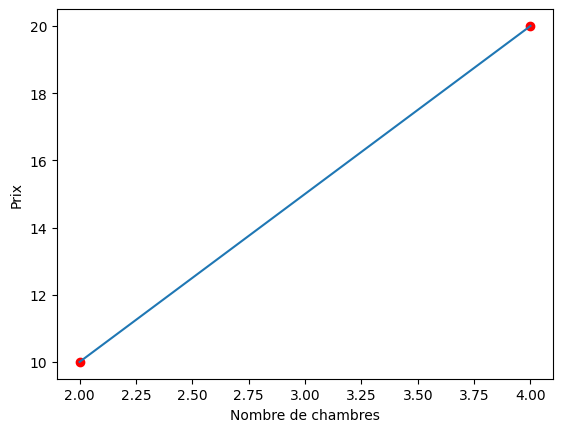

In [ ]:
# Génère les points
plt.scatter(data["n_chambres"], data["prix"], c="r")
# Génère la droite
plt.plot(data["n_chambres"], data["prix"])
plt.xlabel("Nombre de chambres")
plt.ylabel("Prix")
plt.show()

In [ ]:
data = pd.DataFrame([{"n_chambres": 2, "prix": 10},
                     {"n_chambres": 4, "prix": 20},
                     {"n_chambres": 4, "prix": 15},
                     {"n_chambres": 1, "prix": 3.5},
                     {"n_chambres": 8, "prix": 50},
                     {"n_chambres": 9, "prix": 45},
                     {"n_chambres": 4, "prix": 20}
                     ])
data

,n_chambres,prix
0,2,10.0
1,4,20.0
2,4,15.0
3,1,3.5
4,8,50.0
5,9,45.0
6,4,20.0


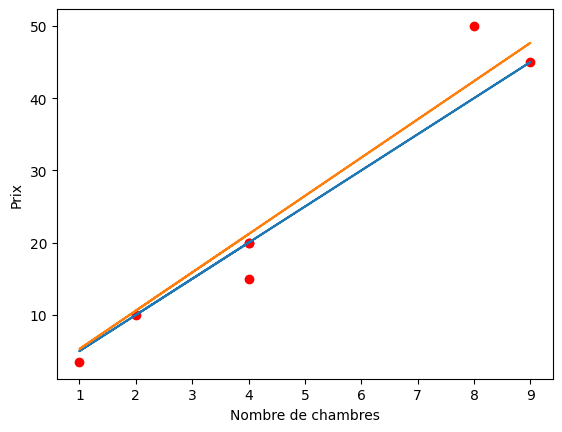

In [ ]:
# Génère les points
plt.scatter(data["n_chambres"], data["prix"], c="r")
# Génère la droite
#plt.plot(data["n_chambres"], data["prix"])
plt.plot(data["n_chambres"], data["n_chambres"] * 5)
plt.plot(data["n_chambres"], data["n_chambres"] * 5.295000000030914)
plt.xlabel("Nombre de chambres")
plt.ylabel("Prix")
plt.show()

In [ ]:
def model(x, w):
  return w * x

In [ ]:
model(3, 5)

15

In [ ]:
def erreur(x, w, y):
  y_model = model(x, w)

  distance = (y - y_model) ** 2

  return np.sum(distance)


In [ ]:
x = 6; y = 54

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-9-8424c1db1c90>, line 1)

In [ ]:
erreur(6,5,54)

576

In [ ]:
n_chambres = data['n_chambres'].values
prix = data['prix'].values

In [ ]:
erreur(n_chambres, 5.5, prix)

118.25

In [ ]:
possible_w = np.arange(-20, 20, 0.001)

In [ ]:
errors = []

for w in possible_w:
  e = erreur(n_chambres, w, prix)
  errors.append(e)

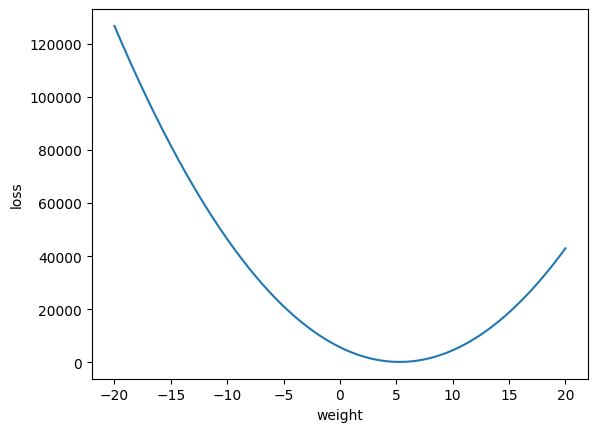

In [ ]:
plt.plot(possible_w, errors)
plt.xlabel("weight")
plt.ylabel("loss")
plt.show()

In [ ]:
np.array(errors).min()

109.96594999999444

In [ ]:
np.argmin(errors)

25295

In [ ]:
possible_w[25295]

5.295000000030914

Modèle y = Wx => w pour **weights**
Les erreurs => Les **Loss**
Le pas dans l'array (0.001) dans notre cas s'appelle le **learning rate**

## Les dérivés

In [ ]:
def f(x):
  return x ** 2

In [ ]:
f(3.0001)

9.000600010000001

In [ ]:
f(3)

9

In [ ]:
(f(3.0001) - f(3)) / 0.0001

6.000100000012054

In [ ]:
def derivee(function, point):
  variation = function(point + 0.0001) - function(point)
  taux = variation / 0.0001
  return taux

In [ ]:
derivee(f, -5)

-9.99989999996842

In [ ]:
def g(x):
  return 3 * x ** 3

In [ ]:
derivee(g, -0)

3.0000000000000004e-08

## L'erreur est une fonction composée

In [ ]:
graph = """
graph LR;
    A(X) --> B[Model];
    C(W) --> B;
    B --> D(Y_model);
    D --> E[(Ymodel - Y) ** 2];
    F(Y) --> E;
    E --> F(Erreur / Loss);
"""

## Chain Rule:
(g o f)'(x) = f'(x) * g'(f(x))

In [ ]:
def double(x):
  return x * 2

In [ ]:
def carre(x):
  return x ** 2

In [ ]:
def compose(x):
  temp = double(x)
  return carre(temp)

In [ ]:
compose(3)

36

In [ ]:
def derivee(function, point):
  variation = function(point + 0.0001) - function(point)
  taux = variation / 0.0001
  return taux

In [ ]:
derivee(double, 3) * derivee(carre, 6)

24.00020000001126

In [ ]:
derivee(compose, 3)

24.000400000048216

In [ ]:
def triple_carre(x):
  return 3 * x ** 2

In [ ]:
[double, carre, triple_carre]

In [ ]:
derivee(double, 3) * derivee(carre, 6) * derivee(triple_carre, 36)

5184.050400212952

In [ ]:
def compose_v2(x):
  step1 = double(x)
  step2 = carre(step1)
  return triple_carre(step2)


In [ ]:
derivee(compose_v2, 3)

5184.2592057710135

In [ ]:
def chain_rule(chaine, point):
  f = chaine[0]
  g= chaine[1]
  h= chaine[2]

  #forward pass: calculer les valeurs intermédiaires
  f_point= f(point)
  g_point = g(f_point)

  #backward pass: calculer les dérivées
  df_dx = derivee(f, point)
  dg_dx = derivee(g, f_point)
  dh_dx = derivee(h, g_point)

  return df_dx * dg_dx * dh_dx

In [ ]:
chain_rule([double, carre, triple_carre], 3)

5184.050400212952

# Vecteurs & Matrices

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.DataFrame([ {"n_chambres" : 2, "superficie" : 40, "prix" : 10},
                     {"n_chambres" : 4,"superficie" : 35,  "prix" : 20},
                    {"n_chambres" : 3,"superficie" : 21,  "prix" : 15},
                     {"n_chambres" : 3,"superficie" : 18,  "prix" : 20},
                     {"n_chambres" : 1,"superficie" : 53,  "prix" : 3.5},
                    {"n_chambres" : 6,"superficie" : 75,  "prix" : 31},
                     {"n_chambres" : 5,"superficie" : 10,  "prix" : 33},
                    {"n_chambres" : 8,"superficie" : 46,  "prix" : 36},
                    {"n_chambres" : 7,"superficie" : 17,  "prix" : 50},
                    {"n_chambres" : 9,"superficie" : 100,  "prix" : 42},
                    ])
data

,n_chambres,superficie,prix
0,2,40,10.0
1,4,35,20.0
2,3,21,15.0
3,3,18,20.0
4,1,53,3.5
5,6,75,31.0
6,5,10,33.0
7,8,46,36.0
8,7,17,50.0
9,9,100,42.0


In [ ]:
X = data[["n_chambres", "superficie"]].values
X

array([[  2,  40],
       [  4,  35],
       [  3,  21],
       [  3,  18],
       [  1,  53],
       [  6,  75],
       [  5,  10],
       [  8,  46],
       [  7,  17],
       [  9, 100]])

In [ ]:
X.shape

(10, 2)

In [ ]:
X.ndim #Matrice #Tenseur => Tensor

2

In [ ]:
test = np.array([X,X,X])

In [ ]:
test.shape

(3, 10, 2)

In [ ]:
test.ndim

3

1 Caractéristique:
  - y = wx
  - Droite
  - E = (y - y_model) ** 2
  - Dérivée l'erreur par rapport à W

2 Caractéristiques
 - y = w1x1 + w2x2
 - Plan
 - E reste la même
 - Dérivée l'erreur par rapport à W1 & W2

[x1, x2] [ w1
           w2]

Un tenseur de dimension 1 est un vecteur

Pour chaque caractéristique Xx, il faudra avoir un Wx



In [ ]:
maison = [[  2,  40],
       [  4,  35],
       [  3,  21],
       [  3,  18]]
weights = [0.23, 3]

In [ ]:
prix  = 0
for x, w in zip(maison, weights):
  prix = prix + x * w
prix

18.46

Pour faire un produit matriciel, il faut que le nombre de colonnes de la matrice 1 soit égal au nombre de lignes de la matrice 2

In [ ]:
maison = np.array([
    [2, 1, 3],
    [0, -1, 4],
    [3, 1, -5]
])

In [ ]:
maison.shape

(3, 3)

In [ ]:
W = np.array([2,1,3])

In [ ]:
Y = np.dot(maison, W)
Y

array([14, 11, -8])

Y = X1W1 + X2W2 + X3W + ...

=> Y =  X.W où . (appellé dot) est le produit matriciel qu'effectue np.dot

=> Ainsi si on pars de 1000 maison avec 13 caractéristique, il faut qu'on ait 13 weights et on aura un produit matriciel (1000, 1)

(1000, 13).(13,1) => (1000, 1) => La dimension 1 est la prédiction

y = X . W => x1w1 + x2w2

Si je dois dériver y en w1, la partie x2w2 ne fluctue pas, ce qui en fait une constante dont la dérivée est 0

De plus, la dérivée d'une fonction de forme f(x) = ax est f'(x) = a

Donc dy_dw1 = x1 & dy_dw2 = x2

La dérivée de Y en w1 et w2 peut s'écrire sous la forme d'un produit matriciel:
  
  [W1 W2][x1 x2]

  [x1 x2] est sur une colonne et donc avec un shape (2,1)

Néanmoins pour le calcul de Y, on avait les données de la forme [x1, x2] avec un shape (2,1), qui s'avère être la transposée de l'élément permettant le calcul de la dérivée


In [ ]:
x = np.array([
    [1, 0, 2],
    [3, -1, 2]
])

In [ ]:
x.shape

(2, 3)

In [ ]:
transpose_X = x.T
transpose_X

array([[ 1,  3],
       [ 0, -1],
       [ 2,  2]])

In [ ]:
transpose_X.shape

(3, 2)

.T permet de créer la transposée d'une matrice (ce qui consiste en quelque sorte à tourner de 90 degrés la matrice)

In [ ]:
W = np.array([2,1,3,2,3,5,4,5,6,7,8,12,5])

In [ ]:
dm_dw = X.T

dm_dx = W.T

dm_dw

array([[  2,   4,   3,   3,   1,   6,   5,   8,   7,   9],
       [ 40,  35,  21,  18,  53,  75,  10,  46,  17, 100]])

La dérivée du modèle par rapport aux différents W est la transposée de X.

Quand on écrits une formule de type f(x) = ax + b,
le a est le poids / la weight
et le b s'apelle le biais / la baseline

Dans notre exemple des maisons, le biais peut être une valeur minimale par défaut qui serait de 25 000€ avant même de considérer les caractéristiques

Avec l'ajout du biais, on obtient une formule de Y du type Y = x1w1 + x2w2 + ... + b

la dérivée de Y en fonction de b est égale à 1 Y(b) = b est la forme f(x) = x

### Nouveau calcul de la fonction d'erreur

Y_Model = np.dot(X . W) + B

E = Y - Y_model ** 2

In [ ]:
import numpy as np

In [ ]:
def erreur(x, w, y):
  y_model = model(x, w)

  distance = (y - y_model) ** 2

  return np.sum(distance)

In [ ]:
def erreur(X, Y, W, B):
  M = np.dot(X, W)
  P = M + B
  L = np.mean((Y-P) ** 2)
  return L

In [ ]:
X = np.array([
    [2,3,-2],
    [4,5,-1],
    [-5,2,3],
    [0,5,4]
])

In [ ]:
X.shape

(4, 3)

In [ ]:
Y = np.array([
    [2],
    [5],
    [6],
    [3]
])

In [ ]:
Y.shape

(4, 1)

In [ ]:
W = np.array([
    [0.02],
    [18],
    [15]
])

In [ ]:
B = 0.5

In [ ]:
erreur(X, Y, W, B)

8232.7495

In [ ]:
params = {
    "W": W,
    "B": B
}

In [ ]:
def erreur(X, Y, params):
  info = {}

  M = np.dot(X, params['W'])
  P = M + params['B']
  L = np.mean((Y - P) **2)

  info['M'] = M
  info['P'] = P
  info['X'] = X
  info['Y'] = Y

  return L, info

In [ ]:
loss, info = erreur(X, Y, params)

In [ ]:
loss

8232.7495

In [ ]:
info

{'M': array([[ 24.04],
        [ 75.08],
        [ 80.9 ],
        [150.  ]]),
 'P': array([[ 24.54],
        [ 75.58],
        [ 81.4 ],
        [150.5 ]]),
 'X': array([[ 2,  3, -2],
        [ 4,  5, -1],
        [-5,  2,  3],
        [ 0,  5,  4]]),
 'Y': array([[2],
        [5],
        [6],
        [3]])}

In [ ]:
def gradient(info, params):
  grads ={}

  # backward
  dL_dP = -2 * (info['Y'] - info['P']) # (4,1)
  dP_dM = 1
  dM_dW = info['X'].T # (3,4)

  # dL_dW = dL_dP * dP_dM * dM_dW
  dL_dW = np.dot(dM_dW, dL_dP) * dP_dM # (dM_dW (3,4) & dL_dP(4,1))
  dL_dB = np.sum(dL_dP * dP_dM)

  grads['W'] = dL_dW
  grads['B'] = dL_dB

  return grads

In [ ]:
grads = gradient(info, params)

In [ ]:
params

{'W': array([[ 0.02],
        [18.  ],
        [15.  ]]),
 'B': 0.5}

In [ ]:
grads

{'W': array([[ -99.2 ],
        [2617.64],
        [1401.08]]),
 'B': 632.04}

Avec l'obtention du gradient, l'objectif est de pouvoir obtenir un meilleur W ainsi:

W = W - dL_dW

Néanmoins la valeur de la dérivée pouvant être très forte (exemple: W = 18 et dL_dW = 2617), la variation de W le ferait passer de 18 à -2599

On ajoute le pas alpha a: W = W - a*dL_dW

In [ ]:
params["W"] = params["W"] - 0.01 * grads["W"]

In [ ]:
params["B"] = params["B"] - 0.01 * grads["B"]

In [ ]:
loss, info = erreur(X, Y, params)

In [ ]:
loss

1604.6036749200002

In [ ]:
info

{'M': array([[-24.4836],
        [-37.8232],
        [-18.4452],
        [-36.9252]]),
 'P': array([[-30.304 ],
        [-43.6436],
        [-24.2656],
        [-42.7456]]),
 'X': array([[ 2,  3, -2],
        [ 4,  5, -1],
        [-5,  2,  3],
        [ 0,  5,  4]]),
 'Y': array([[2],
        [5],
        [6],
        [3]])}

In [ ]:
learning_rate = 0.01
for p in params:
  params[p] = params[p] - learning_rate * grads[p]

In [ ]:
def erreur(X, Y, params):
  info = {}

  M = np.dot(X, params['W'])
  P = M + params['B']
  L = np.mean((Y - P) **2)

  info['M'] = M
  info['P'] = P
  info['X'] = X
  info['Y'] = Y

  return L, info

In [ ]:
def train(X, Y, params, epochs, learning_rate):
  errors = []


  for i in range(epochs):
    # forward
    loss, info = erreur(X, Y, params)
    errors.append(loss)
    print(f'Epoch {i + 1}... loss: {loss}')

    # backward
    grads = gradient(info, params)

    # update
    for p in params:
      params[p] = params[p] - learning_rate * grads[p]

  return params, errors


In [ ]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [ ]:
Y

array([[2],
       [5],
       [6],
       [3]])

In [ ]:
params

{'W': array([[ 1.012 ],
        [-8.1764],
        [ 0.9892]]),
 'B': -5.820399999999999}

In [ ]:
params, errors = train(X, Y, params, 10, 0.01)

TypeError: train() takes 4 positional arguments but 5 were given

# Descente de Gradient V2

In [ ]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (10,) and (60,)

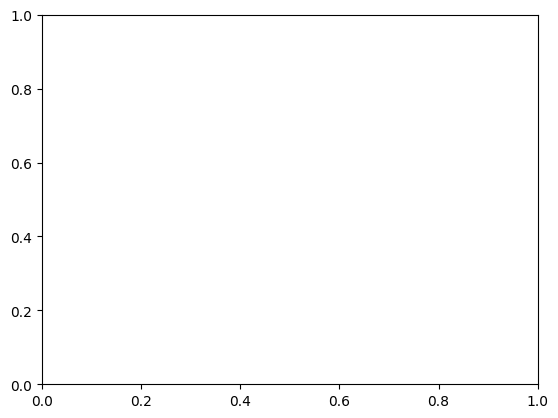

In [ ]:
plt.plot(list(range(10)), errors)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')

In [ ]:
def predict(X,params):
  M = np.dot(X, params['W'])
  P = M + params['B']
  return P

In [ ]:
prediction = predict(X, params)
prediction

array([[3.10652802],
       [3.60830257],
       [5.21715757],
       [3.97693028]])

In [ ]:
Y

array([[2],
       [5],
       [6],
       [3]])

# L'exemple des données du Boston House Price

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

In [ ]:
print(raw_df)

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

In [ ]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
X = data

In [ ]:
Y = target.reshape((506, 1))

In [ ]:
target.reshape((506, 1))

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

# Train test split

L'objectif ici de se séparer notre dataset en deux. 65/70% seront alloués à l'entrainement, 35/30% aux tests

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Standard scaler

L'objectif est de ramener toutes les variables entre 0 et 1 pour éviter qu'une colonne ait un poids démesuré par rapport à une autre

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.mean()

1.545253788039268e-15

In [ ]:
X_train.std() # Ecart-type

1.0000000000000004

# Entrainement du model

In [ ]:
def erreur(X, Y, params):
  info = {}

  M = np.dot(X, params['W'])
  P = M + params['B']
  L = np.mean((Y - P) **2)

  info['M'] = M
  info['P'] = P
  info['X'] = X
  info['Y'] = Y

  return L, info

In [ ]:
def gradient(info, params):
  grads ={}

  # backward
  dL_dP = -2 * (info['Y'] - info['P']) # (4,1)
  dP_dM = 1
  dM_dW = info['X'].T # (3,4)

  # dL_dW = dL_dP * dP_dM * dM_dW
  dL_dW = np.dot(dM_dW, dL_dP) * dP_dM # (dM_dW (3,4) & dL_dP(4,1))
  dL_dB = np.sum(dL_dP * dP_dM)

  grads['W'] = dL_dW
  grads['B'] = dL_dB

  return grads

In [ ]:
def train(X, Y, epoch, learning_rate):
# weight initialisation
  np.random.seed(42)
  n_features = X.shape[1]
  params = {}
  params['W'] = np.random.randn(n_features, 1)
  params['B'] = np.random.randn(1, 1)

  errors = []
  for i in range(epoch):
    # forward
    loss, info = erreur(X, Y, params)
    errors.append(loss)
    print(f'Epoch {i + 1}... loss: {loss}')

    # backward
    grads = gradient(info, params)

    # update
    for p in params:
      params[p] = params[p] - learning_rate * grads[p]

  return params, errors

In [ ]:
params, errors = train(X_train, y_train, epoch=50, learning_rate=0.0001)

Epoch 1... loss: 712.1743316753176
Epoch 2... loss: 576.9266828543414
Epoch 3... loss: 485.858491899185
Epoch 4... loss: 415.2086742559719
Epoch 5... loss: 356.9632229723388
Epoch 6... loss: 307.84342137397
Epoch 7... loss: 266.08549083943615
Epoch 8... loss: 230.48512859031536
Epoch 9... loss: 200.10246942244535
Epoch 10... loss: 174.16135658526716
Epoch 11... loss: 152.00725038460388
Epoch 12... loss: 133.0840641810185
Epoch 13... loss: 116.91811788815627
Epoch 14... loss: 103.1055392228527
Epoch 15... loss: 91.30184176600252
Epoch 16... loss: 81.21313594214138
Epoch 17... loss: 72.58866623374146
Epoch 18... loss: 65.21445904094307
Epoch 19... loss: 58.90791093686188
Epoch 20... loss: 53.51317628743457
Epoch 21... loss: 48.89723533426671
Epoch 22... loss: 44.94654186494025
Epoch 23... loss: 41.56416469328747
Epoch 24... loss: 38.66734994534333
Epoch 25... loss: 36.18544199214979
Epoch 26... loss: 34.05811009190945
Epoch 27... loss: 32.23383564908883
Epoch 28... loss: 30.6686216745417

In [ ]:
Y_train

array([18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4, 35.4, 24. , 13.4,
       26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6, 32.9, 36.2, 11. ,
        7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5, 15.2, 17.4, 13.6,
        8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9, 25. , 12.7, 29.1,
       12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8, 20.5, 14.9, 10.9,
       19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3, 11.8, 31. , 28.7,
       16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9, 20.2, 43.1, 34.6,
       13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,  9.6, 19.4, 19.4,
        9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5, 15.6, 20.9, 21.7,
       12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6, 21.2, 23.8, 17.1,
       22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. , 24.1, 36.2, 15.7,
       32.2, 13.5, 17.9, 13.3, 11.7, 41.7, 18.4, 13.1, 25. , 21.2, 16. ,
       34.9, 25.2, 24.8, 21.5, 23.4, 18.9, 10.8, 21. , 27.5, 17.5, 13.5,
       28.7, 14.8, 19.1, 28.6, 13.1, 19. , 11.3, 13

ValueError: x and y must have same first dimension, but have shapes (50,) and (60,)

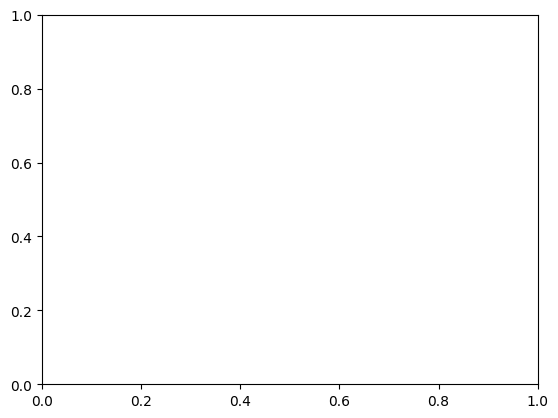

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(50)), errors)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')

# Evaluation sur les données de test

In [ ]:
def predict(X,params):
  M = np.dot(X, params['W'])
  P = M + params['B']
  return P

In [ ]:
def mse(y, pred): # mean squared error
  return np.mean((y-pred) ** 2)

def rmse(y, pred): #root mean squared error
  return np.sqrt(np.mean((y-pred) ** 2))

def mae(y, pred): #min absolute error
  return np.mean(np.abs(y - pred))

In [ ]:
prediction = predict(X_test, params)
score_rmse = rmse(y_test, prediction)
score_mse = mse(y_test, prediction)
score_mae = mae(y_test, prediction)

print(f'rmse: {score_rmse}, mse : {score_mse}, mae: {score_mae}')

KeyError: 'W'

In [ ]:
np.sqrt(21.20)

4.604345773288535

rmse_train= 4.6 & rmse_test = 5.77 => rmse_train < rmse_test => overfitting (meilleur résultat en entrainement qu'en test)

In [ ]:
params

{'W': array([[-0.61301264],
        [ 0.3831569 ],
        [-0.33512567],
        [ 0.75907099],
        [-0.99290619],
        [ 3.1112321 ],
        [ 0.24618677],
        [-1.28640179],
        [ 0.15130188],
        [-0.18963709],
        [-2.1719948 ],
        [ 0.74003657],
        [-3.34785879]]),
 'B': array([[22.13243641]])}

On voit que c'est la sixième caractéristique qui est la plus impactante, soit le nombre de chambres

# Comparaison de notre régression linéaire (X.W + B) avec Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)
score_rmse = rmse(y_test, prediction)
score_mse = mse(y_test, prediction)
score_mae = mae(y_test, prediction)

print(f'rmse: {score_rmse}, mse : {score_mse}, mae: {score_mae}')

rmse: 5.5316076807840195, mse : 30.598683534108762, mae: 3.8982724631696373


## Ajout d'une non-linéarité quand la régression ne suffit pas

Si les données se trouvent organisées de sorte à ce qu'une simple régression linéaire ne suffit pas à ibne prédire, il est possible d'appliquer une transformation aux données pour obtenir une régression pertinente.

Ainsi, on partirait sur l'idée de réaliser:
[W1.X1] -> [B1] -> [Fonction non linéaire] -> [W2.X] -> [B2] -> Prédiction

La fonction non linéaire doit néanmoins remplir trois conditions:
- dérivable
- monotone
- facile à calculer

# La fonction Sigmoid

θ(x) = 1 / 1 + e ^ -x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

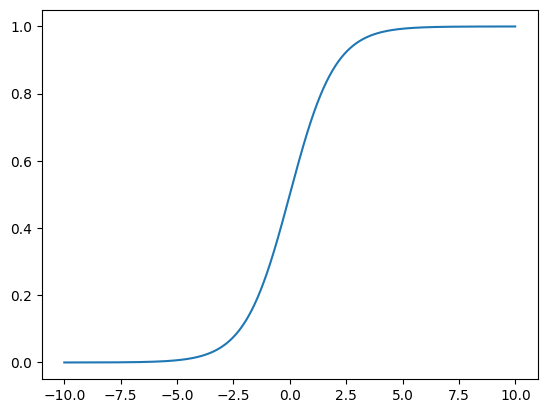

In [ ]:
X = np.arange(-10, 10, 0.01)

plt.plot(X, sigmoid(X))

plt.show()

dsig_dx = sigmoid(x) * (1 - sigmoid(x))

# Modèle avec Sigmoide

In [ ]:
def erreur(X, Y, params):
  info = {}

  M1 = np.dot(X, params['W1'])
  N1 = M1 + params['B1']
  S1 = sigmoid(N1)

  M2 = np.dot(S1, params['W2'])
  P = M2 + params['B2']
  L = np.mean((Y - P) **2)

  info['M1'] = M1
  info['N1'] = N1
  info['S1'] = S1
  info['M2'] = M2
  info['P'] = P
  info['X'] = X
  info['Y'] = Y

  return L, info

In [ ]:
def gradient(info, params):

  dL_dP =  -2 * (info['Y'] - info['P'])

  dP_dM2 = 1
  dL_dM2 = dL_dP * dP_dM2

  dP_dB2 = 1
  dL_dB2 = dL_dP * dP_dB2
  dL_dB2 = dL_dB2.sum()

  dM2_dW2 = info['S1'].T
  # M2 s'obtient par S1 . W2 or la dérivée d'un produit matriciel en l'une des valeurs est le transposée de l'autre valeur
  dL_dW2 = np.dot(dM2_dW2, dL_dP)

  dM2_dS1 = params['W2'].T
  dL_dS1 = np.dot(dL_dM2, dM2_dS1)

  dS1_dN1 = sigmoid(info['N1']) * (1- sigmoid(info['N1']))
  dL_dN1 = dL_dS1 * dS1_dN1

  dN1_dB1 = 1
  dN1_dM1 = 1

  dL_dB1 = (dL_dN1 * dN1_dB1).sum()
  dL_dB1 = dL_dB1.sum()
  dL_dM1 = dL_dN1 * dN1_dM1

  dM1_dW1 = info['X'].T
  dL_dW1 = np.dot(dM1_dW1, dL_dM1)


  grads = {}
  grads['W1'] = dL_dW1
  grads['B1'] = dL_dB1
  grads['W2'] = dL_dW2
  grads['B2'] = dL_dB2


  return grads



In [ ]:
def train(X, Y, epoch, learning_rate):

  # weights initialization
  np.random.seed(42)
  n_features  = X.shape[1]
  n_feat_transform = n_features # Pour avoir le même nombre de feature, cela peut être changer
  params = {}
  params['W1'] = np.random.randn(n_features, n_feat_transform)
  params['B1'] = np.random.randn(1, n_feat_transform)
  params['W2'] = np.random.randn(n_feat_transform, 1)
  params['B2'] = np.random.randn(1, 1)

  errors = []
  for i in range(epoch):

    # forward
    loss, info = erreur(X, Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} .............. loss : {loss}')

    #backward

    grads = gradient(info, params)

    # update
    for p in params:
      params[p] = params[p] - learning_rate * grads[p]

  return params, errors

# Application de ce nouveau modèle sur les données de Boston

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
Y = target.reshape((506, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train.shape, y_train.shape



((379, 13), (379, 1))

In [ ]:
params, errors = train(X_train, y_train, epoch=60, learning_rate=0.0001)

Epoch 1 .............. loss : 658.747187918459
Epoch 2 .............. loss : 364.03824881583705
Epoch 3 .............. loss : 204.36163978775102
Epoch 4 .............. loss : 107.81590012640753
Epoch 5 .............. loss : 79.82851947423356
Epoch 6 .............. loss : 69.1923806790014
Epoch 7 .............. loss : 61.51000932784534
Epoch 8 .............. loss : 55.87126460945957
Epoch 9 .............. loss : 51.6108991888034
Epoch 10 .............. loss : 48.18702007396802
Epoch 11 .............. loss : 45.279434222606184
Epoch 12 .............. loss : 42.7098470294775
Epoch 13 .............. loss : 40.38472696704206
Epoch 14 .............. loss : 38.25904125179606
Epoch 15 .............. loss : 36.312561000344154
Epoch 16 .............. loss : 34.53576444191028
Epoch 17 .............. loss : 32.92242489198569
Epoch 18 .............. loss : 31.46630112837073
Epoch 19 .............. loss : 30.159695404962292
Epoch 20 .............. loss : 28.99257512141943
Epoch 21 .............. los

Text(0.5, 1.0, 'Learning Curve')

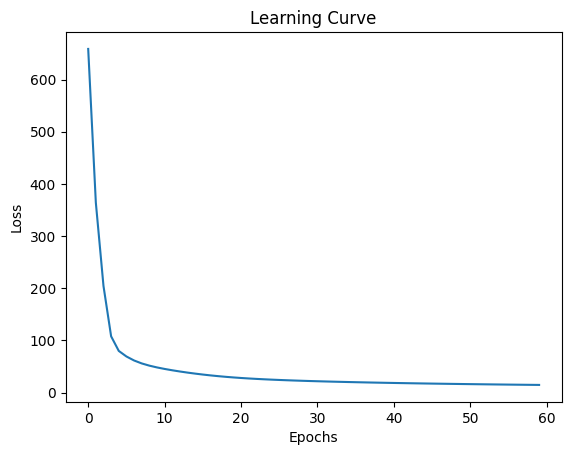

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(errors))), errors)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')

In [ ]:
def predict(X,params):
  M1 = np.dot(X, params['W1'])
  S1 = M1 + params['B1']
  N1 = sigmoid(S1)

  M2 = np.dot(N1, params['W2'])
  P = M2 + params['B2']
  return P

In [ ]:
def mse(y, pred): # mean squared error
  return np.mean((y-pred) ** 2)

def rmse(y, pred): #root mean squared error
  return np.sqrt(np.mean((y-pred) ** 2))

def mae(y, pred): #min absolute error
  return np.mean(np.abs(y - pred))

In [ ]:
prediction = predict(X_test, params)
score_rmse = rmse(y_test, prediction)
score_mse = mse(y_test, prediction)
score_mae = mae(y_test, prediction)

print(f'rmse: {score_rmse}, mse : {score_mse}, mae: {score_mae}')

rmse: 5.133454691179821, mse : 26.352357066396113, mae: 3.351871573131282


# Tentative d'ajout d'une couche supplémentaire

In [ ]:
def erreur(X, Y, params):
  info = {}

  M1 = np.dot(X, params['W1'])
  N1 = M1 + params['B1']
  S1 = sigmoid(N1)

  M2 = np.dot(S1, params['W2'])
  N2 = M2 + params['B2']
  S2 = sigmoid(N2)

  M3 = np.dot(S2, params['W3'])
  P = M3 + params['B3']

  L = np.mean((Y - P) **2)

  info['M1'] = M1
  info['N1'] = N1
  info['S1'] = S1
  info['M2'] = M2
  info['N2'] = N2
  info['S2'] = S2
  info['M3'] = M3
  info['P'] = P
  info['X'] = X
  info['Y'] = Y

  return L, info

In [ ]:
def gradient(info, params):

  dL_dP =  -2 * (info['Y'] - info['P'])

  dP_dM3 = 1
  dL_dM3 = dL_dP * dP_dM3

  dP_dB3 = 1
  dL_dB3 = dL_dP * dP_dB3
  dL_dB3 = dL_dB3.sum()

  dM3_dW3 = info['S2'].T
  # M2 s'obtient par S1 . W2 or la dérivée d'un produit matriciel en l'une des valeurs est le transposée de l'autre valeur
  dL_dW3 = np.dot(dM3_dW3, dL_dP)

  dM3_dS2 = params['W3'].T
  dL_dS2 = np.dot(dL_dM3, dM3_dS2)

  dS2_dN2 = sigmoid(info['N2']) * (1- sigmoid(info['N2']))
  dL_dN2 = dL_dS2 * dS2_dN2

  dN2_dB2 = 1
  dN2_dM2 = 1

  dL_dB2 = (dL_dN2 * dN2_dB2).sum()
  dL_dB2 = dL_dB2.sum()
  dL_dM2 = dL_dN2 * dN2_dM2

  dM2_dW2 = info['N1'].T
  dL_dW2 = np.dot(dM2_dW2, dL_dM2)

  dM2_dS1 = params['W2'].T
  dL_dS1 = np.dot(dL_dM2, dM2_dS1)

  dS1_dN1 = sigmoid(info['N1']) * (1- sigmoid(info['N1']))
  dL_dN1 = dL_dS1 * dS1_dN1

  dN1_dB1 = 1
  dN1_dM1 = 1

  dL_dB1 = (dL_dN1 * dN1_dB1).sum()
  dL_dB1 = dL_dB1.sum()
  dL_dM1 = dL_dN1 * dN1_dM1

  dM1_dW1 = info['X'].T
  dL_dW1 = np.dot(dM1_dW1, dL_dM1)

  grads = {}
  grads['W1'] = dL_dW1
  grads['B1'] = dL_dB1
  grads['W2'] = dL_dW2
  grads['B2'] = dL_dB2
  grads['W3'] = dL_dW3
  grads['B3'] = dL_dB3


  return grads


In [ ]:
def train(X, Y, epoch, learning_rate):

  # weights initialization
  np.random.seed(42)
  n_features  = X.shape[1]
  n_feat_transform = n_features # Pour avoir le même nombre de feature, cela peut être changer
  params = {}
  params['W1'] = np.random.randn(n_features, n_feat_transform)
  params['B1'] = np.random.randn(1, n_feat_transform)
  params['W2'] = np.random.randn(n_feat_transform, n_feat_transform)
  params['B2'] = np.random.randn(1, n_feat_transform)
  params['W3'] = np.random.randn(n_feat_transform, 1)
  params['B3'] = np.random.randn(1, 1)

  errors = []
  for i in range(epoch):

    # forward
    loss, info = erreur(X, Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} .............. loss : {loss}')

    #backward

    grads = gradient(info, params)

    # update
    for p in params:
      params[p] = params[p] - learning_rate * grads[p]

  return params, errors

In [ ]:
params, errors = train(X_train, y_train, epoch=60, learning_rate=0.00001)

Epoch 1 .............. loss : 491.4152301368375
Epoch 2 .............. loss : 447.39462519164437
Epoch 3 .............. loss : 405.521585566204
Epoch 4 .............. loss : 366.26987920040847
Epoch 5 .............. loss : 329.873366405913
Epoch 6 .............. loss : 296.39993316176003
Epoch 7 .............. loss : 265.8648877859274
Epoch 8 .............. loss : 238.27044525805982
Epoch 9 .............. loss : 213.5971877661417
Epoch 10 .............. loss : 191.7844013749238
Epoch 11 .............. loss : 172.71683531203414
Epoch 12 .............. loss : 156.22310387452538
Epoch 13 .............. loss : 142.08478719849802
Epoch 14 .............. loss : 130.05238738836846
Epoch 15 .............. loss : 119.86359275839492
Epoch 16 .............. loss : 111.25997010962955
Epoch 17 .............. loss : 103.99961025621354
Epoch 18 .............. loss : 97.86488970808033
Epoch 19 .............. loss : 92.66583839763298
Epoch 20 .............. loss : 88.2402780269163
Epoch 21 ............

Text(0.5, 1.0, 'Learning Curve')

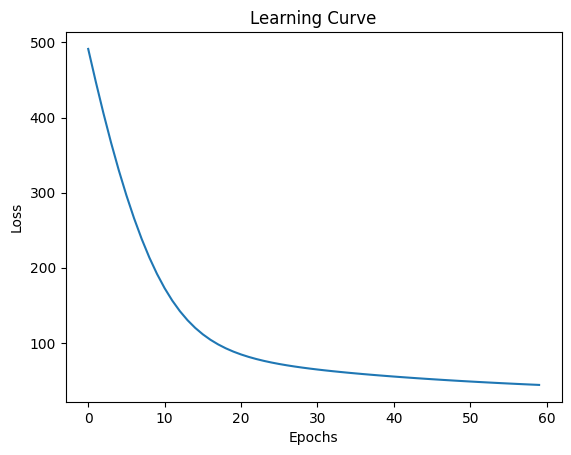

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(errors))), errors)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')

In [ ]:
def predict(X,params):
  M1 = np.dot(X, params['W1'])
  S1 = M1 + params['B1']
  N1 = sigmoid(S1)

  M2 = np.dot(N1, params['W2'])
  S2 = M2 + params['B2']
  N2 = sigmoid(S2)

  M3 = np.dot(N1, params['W3'])
  P = M3 + params['B3']
  return P

In [ ]:
prediction = predict(X_test, params)
score_rmse = rmse(y_test, prediction)
score_mse = mse(y_test, prediction)
score_mae = mae(y_test, prediction)

print(f'rmse: {score_rmse}, mse : {score_mse}, mae: {score_mae}')

rmse: 12.284426437755151, mse : 150.9071329046177, mae: 9.385489955945978


#With TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
import pandas as pd
import numpy as np

data_url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[0::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


# Scaling the data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)
target = target.reshape((-1,1))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)


In [ ]:
data.shape

(506, 13)

In [ ]:
lr = Sequential([Dense(3, activation='relu')]) # Ici, on indique qu'on fait une régression linéaire suivi d'une non-linéarité qu'on appelle "relu"
lr.compile(optimizer=SGD(learning_rate=0.0001), loss='mse')
history = lr.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 554.2312 - val_loss: 563.0167
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 569.4638 - val_loss: 562.6767
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 608.0450 - val_loss: 562.3260
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 573.4799 - val_loss: 561.9651
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 545.9597 - val_loss: 561.6206
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 590.4567 - val_loss: 561.2625
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 627.6499 - val_loss: 560.8937
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 592.6140 - val_loss: 560.5547
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 559.8637 - val_loss: 560.2069
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 557.6710 - val_loss: 559.8384
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 566.8240 - val_loss: 559.4835
Epoch 12/100